In [2]:
%run __init__.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from itertools import combinations
from tools import *
from before_stack import *
from conversion import *
from aper_phot import *
from cr_to_flux import *
date='111223'

In [34]:
#untar_obs(folder_name)
'''
make_obs_log(horizon_id=90003890,
             folder_name='Garradd_raw_all',
             map_type='sk',
             output_name='all_obs-log_Garradd.txt')
'''

"\nmake_obs_log(horizon_id=90003890,\n             folder_name='Garradd_raw_all',\n             map_type='sk',\n             output_name='all_obs-log_Garradd.txt')\n"

In [35]:
# stack image
'''
dates = ['110423','110430','111028','111031',
         '111220','111223','120301','120304',
         '120401']
for d in dates:
    obs_log_name = d+'_obs-log_Garradd.txt'
    size=(1000,1000)
    output_name = d+'_Garradd'
    for filt in ['uvv', 'uw1']:
        stack_image(obs_log_name,filt,size,output_name)
'''

"\ndates = ['110423','110430','111028','111031',\n         '111220','111223','120301','120304',\n         '120401']\nfor d in dates:\n    obs_log_name = d+'_obs-log_Garradd.txt'\n    size=(1000,1000)\n    output_name = d+'_Garradd'\n    for filt in ['uvv', 'uw1']:\n        stack_image(obs_log_name,filt,size,output_name)\n"

In [3]:
# aperture photometry
# src_method = 'count', 'median'
# bg_method = 'circle_mean', 'circle_median', 'donut_mean', 'donut_median', 'multi_mean'
src_step_num = 10
# uw1
img_name_uw1 = date+'_Garradd_uw1.fits'
src_center_uw1 = (1000, 1000)
src_r_uw1 = 50
bg_center_uw1 = (716, 1473)
bg_r_uw1 = 100
    
result_uw1 = aper_phot(img_name_uw1, 'uw1', 
                       src_center_uw1, src_r_uw1, 
                       bg_center_uw1, bg_r_uw1,
                       'median', 'single_mean',
                       src_step_num)

cr_uw1, cr_uw1_err = result_uw1[0]
snr_uw1 = result_uw1[1]
mag_uw1, mag_uw1_err = result_uw1[2]
bg_cr_uw1, bg_cr_uw1_err = result_uw1[3]

print('UW1:\n'
      +'COUNT RATE (cts/s): '+str(cr_uw1)+' +/- '+str(cr_uw1_err)+'\n'
      +'SNR: '+str(snr_uw1)+'\n'
      +'MAGNITUDE (mag): '+str(mag_uw1)+' +/- '+str(mag_uw1_err)+'\n'
      +'BACKGROUND CR (cts/s/arcsec2): '+str(bg_cr_uw1)+' +/- '+str(bg_cr_uw1_err)+'\n')

# v
img_name_v = date+'_Garradd_uvv.fits'
src_center_v = (1000,1000)
src_r_v = 35.0
bg_center_v = (716, 1473)
bg_r_v = 100

result_v = aper_phot(img_name_v, 'v',
                     src_center_v, src_r_v, 
                     bg_center_v, bg_r_v,
                     'median', 'single_mean',
                     src_step_num)

cr_v, cr_v_err = result_v[0]
snr_v = result_v[1]
mag_v, mag_v_err = result_v[2]
bg_cr_v, bg_cr_v_err = result_v[3]

print('V:\n'
      +'COUNT RATE (cts/s): '+str(cr_v)+' +/- '+str(cr_v_err)+'\n'
      +'SNR: '+str(snr_v)+'\n'
      +'MAGNITUDE (mag): '+str(mag_v)+' +/- '+str(mag_v_err)+'\n'
      +'BACKGROUND CR (cts/s/arcsec2): '+str(bg_cr_v)+' +/- '+str(bg_cr_v_err)+'\n')


UW1:
COUNT RATE (cts/s): 536.0890037622898 +/- 1.0775328686248005
SNR: 497.51522145813755
MAGNITUDE (mag): 10.666907752288985 +/- 0.0300792704356002
BACKGROUND CR (cts/s/arcsec2): 0.0036251413310045204 +/- 1.532399921780271e-05

V:
COUNT RATE (cts/s): 1258.364110881235 +/- 1.3496855036922946
SNR: 932.3387614661087
MAGNITUDE (mag): 10.14048419121245 +/- 0.013052054607936453
BACKGROUND CR (cts/s/arcsec2): 0.03350393421396979 +/- 3.723478611691124e-05



In [13]:
# calculate OH
spec_name_sun = 'sun_1A.txt'
spec_name_OH = '2019-07-15_emission_models_OH.txt'
spec_name_sum = 'cont_emis_sum.txt'

# method = 'cr', 'flux_cf', 'flux_my_cf', 'flux_cr'
flux, flux_err = get_OH('flux_cr',
                        spec_name_sun, 
                        spec_name_OH, spec_name_sum,
                        cr_uw1, cr_uw1_err,
                        cr_v, cr_v_err,
                        0)
print('flux of OH: '+str(flux)+' +/- '+str(flux_err))


flux of uw1 (reflection): 1.1204306348023206e-09 +/- 1.2017419859713184e-12
flux of v: 3.039160245383842e-10 +/- 3.259716715633213e-13
flux of OH: 5.347229511850492e-10 +/- 1.383195362633645e-12


In [14]:
obs_log_name = date+'_obs-log_Garradd.txt'
wvm_name = 'Garradd_wvm.txt'

num, num_err = flux2num(flux, flux_err, 
                        'fluorescenceOH.txt', 
                        obs_log_name, 
                        method='both_ends', 
                        horizon_id=90003890)
print('number of molecules: '
      + str(num) + ' +/- ' + str(num_err))

q, q_err = num2q(num, num_err, 
                 wvm_name, aperture=False)
print('production rate (mole s-1): '
      + str(q) + ' +/- ' + str(q_err))

mid-time r: 1.550538777911 (AU)
mid-time rv: 0.0359673 (km/s)
mid-time delta: 2.00917071257321 (AU)
mid-time g factor (for 3 total lines): 8.082583551408248e-16 (erg s-1 mole-1)
number of molecules: 7.5105715584079e+33 +/- 1.9427981775038528e+31
production rate (mole s-1): 2.3564029266974955e+29 +/- 6.095428657926391e+26


In [6]:
# Effective visual bond albedo = 0.05
# Effective thermal albedo = 1
z = 1.710E+17
active_area = q/z
active_area_err = q_err/z
r = np.sqrt(active_area/(4*np.pi))
r_err = active_area_err/(4*np.sqrt(np.pi*active_area))

print('active area(km2): '+str(active_area/1e10)+' +/- '+str(active_area_err/1e10))
print('radiu(km): '+str(r/1e5)+' +/- '+str(r_err/1e5))

active area(km2): 137.8013407425436 +/- 0.3564578162530053
radiu(km): 3.3114773548875736 +/- 0.004282984403975671


In [7]:
def q_from_v(v, v_err):
    log_q = 30.675 - 0.2453*v
    log_q_err_0 = error_prop('mul', 
                             0.2453, 0.0013,
                             v, v_err)
    log_q_err = error_prop('sub',
                           30.675, 0.007,
                           0.2453*v, log_q_err_0)
    q = np.power(10, log_q)
    q_err = np.power(10, log_q)*np.log(10.)*log_q_err
    return q, q_err

q_from_v(result_v[2][0], result_v[2][1])

(1.5400656270791308e+28, 5.413312189552395e+26)

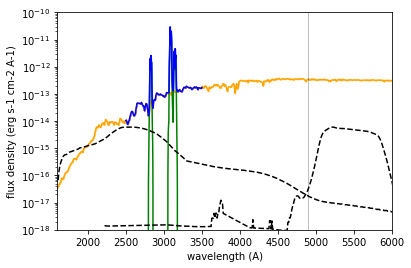

In [7]:
spec_name_sun = 'sun_1A.txt'
spec_name_OH = '2019-07-15_emission_models_OH.txt'
r = 0

ea_wave_uw1 = read_ea('uw1')[0]
ea_area_uw1 = read_ea('uw1')[1]
ea_wave_uw1 = ea_wave_uw1[ea_area_uw1!=0]
ea_area_uw1 = ea_area_uw1[ea_area_uw1!=0]
wave_uw1_min = 1600 #min(ea_wave_uw1)
wave_uw1_max = 4900 #max(ea_wave_uw1)

ea_wave_v = read_ea('v')[0]
ea_area_v = read_ea('v')[1]
ea_wave_v = ea_wave_v[ea_area_v!=0]
ea_area_v = ea_area_v[ea_area_v!=0]
wave_v_min = 4900 #min(ea_wave_v)
wave_v_max = 6000 #max(ea_wave_v)

wave_sum_min = 2500
wave_sum_max = 3500

factors = flux_cr_spec(spec_name_sun, spec_name_OH,
                       cr_uw1, cr_uw1_err, 
                       cr_v, cr_v_err, r)
factor_sun_uw1 = factors[0]
factor_sun_uw1_err = factors[1]
factor_sun_v = factors[2]
factor_sun_v_err = factors[3]
factor_OH = factors[4]
factor_OH_err = factors[5]

sun_wave, sun_flux = read_spec(spec_name_sun)
oh_wave, oh_flux = read_spec(spec_name_OH)
sun_flux_uw1 = sun_flux[sun_wave>wave_uw1_min]
sun_wave_uw1 = sun_wave[sun_wave>wave_uw1_min]
sun_flux_uw1 = sun_flux_uw1[sun_wave_uw1<wave_uw1_max]
sun_wave_uw1 = sun_wave_uw1[sun_wave_uw1<wave_uw1_max]
sun_flux_v = sun_flux[sun_wave>wave_v_min]
sun_wave_v = sun_wave[sun_wave>wave_v_min]
sun_flux_v = sun_flux_v[sun_wave_v<wave_v_max]
sun_wave_v = sun_wave_v[sun_wave_v<wave_v_max]

ref_flux_uw1 = factor_sun_uw1*sun_flux_uw1
ref_flux_uw1_err = factor_sun_uw1_err*sun_flux_uw1
ref_flux_v = factor_sun_v*sun_flux_v
ref_flux_v_err = factor_sun_v_err*sun_flux_v
oh_flux = factor_OH*oh_flux
oh_flux_err = factor_OH_err*oh_flux
sum_wave, sum_flux, sum_flux_err = sum_spec(\
    spec_name_OH, factor_OH, factor_OH_err,
    spec_name_sun, factor_sun_uw1, factor_sun_uw1_err)
sum_flux = sum_flux[sum_wave>wave_sum_min]
sum_flux_err = sum_flux_err[sum_wave>wave_sum_min]
sum_wave = sum_wave[sum_wave>wave_sum_min]
sum_flux = sum_flux[sum_wave<wave_sum_max]
sum_flux_err = sum_flux_err[sum_wave<wave_sum_max]
sum_wave = sum_wave[sum_wave<wave_sum_max]

if r==0:
    ref_color = 'orange'
else:
    ref_color = 'red'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(sun_wave_uw1, ref_flux_uw1, ref_color,linestyle='-')
plt.fill_between(sun_wave_uw1, ref_flux_uw1-ref_flux_uw1_err, ref_flux_uw1+ref_flux_uw1_err, color=ref_color, alpha=0.5)
plt.plot(sun_wave_v, ref_flux_v, ref_color,linestyle='-')
plt.fill_between(sun_wave_v, ref_flux_v-ref_flux_v_err, ref_flux_v+ref_flux_v_err, color=ref_color, alpha=0.5)
plt.plot(oh_wave, oh_flux, 'g-')
plt.fill_between(oh_wave, oh_flux-oh_flux_err, oh_flux+oh_flux_err)
plt.plot(sum_wave, sum_flux, 'b-')
plt.fill_between(sum_wave, sum_flux-sum_flux_err, sum_flux+sum_flux_err, color='blue',alpha=0.3)
plt.plot(ea_wave_uw1, 6e-15*ea_area_uw1/max(ea_area_uw1), 'k--')
plt.plot(ea_wave_v, 6e-15*ea_area_v/max(ea_area_v), 'k--')
plt.plot((4900, 4900), (0,1), 'k-', alpha=0.5, linewidth=0.5)
plt.xlim(1600, 6000)
plt.ylim(1e-18, 1e-10)
plt.yscale('log')
plt.xlabel('wavelength (A)')
plt.ylabel('flux density (erg s-1 cm-2 A-1)')
plt.show()